# Imports

In [1]:
%%capture
!pip install sumy

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
import nltk
import plotly
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import ibm_db
import ibm_db_dbi
from sumy.utils import get_stop_words
import string
from collections import Counter
import math

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Database Connection

In [4]:
# @hidden_cell
dsn_hostname = "54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud"
dsn_uid = "qgs98802"  
dsn_pwd = "f20uBnloVxeaSeZK"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "bludb"

dsn_port = "32733"
dsn_protocol = "TCPIP"  

dsn_security = "SSL"

In [5]:
# Formatting dsn in order to make connection
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd, dsn_security)

In [6]:
%%capture
#Connecting to Database
try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

In [7]:
pconn = ibm_db_dbi.Connection(conn)

# Data Retrieval and Wrangling

In [8]:
overall_week1 = f'''SELECT political_alignment, news_sources_type, content, cleaned_tweets, length_of_tweet, day_of_week,
NULLIF(overall_sentiment, 0.0000) AS overall_sentiment, NULLIF (subjectivity, 0.000) AS subjectivity, named_entities,
named_sentiment from nlp_twitter_data_week_1'''
overall_week1_df = pd.read_sql(overall_week1, pconn)

overall_week2 = f'''SELECT political_alignment, news_sources_type, content, cleaned_tweets, length_of_tweet, day_of_week,
NULLIF(overall_sentiment, 0.0000) AS overall_sentiment, NULLIF (subjectivity, 0.000) AS subjectivity, named_entities,
named_sentiment from nlp_twitter_data_week_2'''
overall_week2_df = pd.read_sql(overall_week2, pconn)

overall_week3 = f'''SELECT political_alignment, news_sources_type, content, cleaned_tweets, length_of_tweet, day_of_week,
NULLIF(overall_sentiment, 0.0000) AS overall_sentiment, NULLIF (subjectivity, 0.000) AS subjectivity, named_entities,
named_sentiment from nlp_twitter_data_week_2'''
overall_week3_df = pd.read_sql(overall_week2, pconn)

overall_week3 = f'''SELECT political_alignment, news_sources_type, content, cleaned_tweets, length_of_tweet, day_of_week,
NULLIF(overall_sentiment, 0.0000) AS overall_sentiment, NULLIF (subjectivity, 0.000) AS subjectivity, named_entities,
named_sentiment from nlp_twitter_data_week_3'''
overall_week3_df = pd.read_sql(overall_week3, pconn)

overall_week4 = f'''SELECT political_alignment, news_sources_type, content, cleaned_tweets, length_of_tweet, day_of_week,
NULLIF(overall_sentiment, 0.0000) AS overall_sentiment, NULLIF (subjectivity, 0.000) AS subjectivity, named_entities,
named_sentiment from nlp_twitter_table_week_4_'''
overall_week4_df = pd.read_sql(overall_week4, pconn)

overall_df = pd.concat([overall_week1_df, overall_week2_df, overall_week3_df, overall_week4_df], axis=0, ignore_index=True)

In [9]:
#Separating the data by the variables being tested
conservative_df = overall_df[overall_df['POLITICAL_ALIGNMENT']=='Conservative']
moderate_df = overall_df[overall_df['POLITICAL_ALIGNMENT']=='Moderate']
liberal_df = overall_df[overall_df['POLITICAL_ALIGNMENT']=='Liberal']

# Introduction

In [10]:
mean_sentiment_week1 = "SELECT political_alignment, CAST(AVG(overall_sentiment)as DECIMAL (4,3))\
as average_sentiment from (SELECT tweet_id,political_alignment, news_sources_type,\
length_of_tweet, day_of_week, NULLIF (overall_sentiment, 0.0000) AS overall_sentiment, \
NULLIF (subjectivity, 0.000) as subjectivity from nlp_twitter_data_week_1 \
 WHERE length_of_tweet >= 10)\
GROUP BY political_alignment"
mean_sentiment_week1_df = pd.read_sql(mean_sentiment_week1, pconn)
mean_sentiment_week2 = "SELECT political_alignment, CAST(AVG(overall_sentiment)as DECIMAL (4,3))\
as average_sentiment from (SELECT tweet_id,political_alignment, news_sources_type,\
length_of_tweet, day_of_week, NULLIF (overall_sentiment, 0.0000) AS overall_sentiment, \
NULLIF (subjectivity, 0.000) as subjectivity from nlp_twitter_data_week_2 \
 WHERE length_of_tweet >= 10)\
GROUP BY political_alignment"
mean_sentiment_week2_df = pd.read_sql(mean_sentiment_week2, pconn)
mean_sentiment_week3 = "SELECT political_alignment, CAST(AVG(overall_sentiment)as DECIMAL (4,3))\
as average_sentiment from (SELECT tweet_id,political_alignment, news_sources_type,\
length_of_tweet, day_of_week, NULLIF (overall_sentiment, 0.0000) AS overall_sentiment, \
NULLIF (subjectivity, 0.000) as subjectivity from nlp_twitter_data_week_3 \
 WHERE length_of_tweet >= 10)\
GROUP BY political_alignment"
mean_sentiment_week3_df = pd.read_sql(mean_sentiment_week3, pconn)
mean_sentiment_week4 = "SELECT political_alignment, CAST(AVG(overall_sentiment)as DECIMAL (4,3))\
as average_sentiment from (SELECT tweet_id,political_alignment, news_sources_type,\
length_of_tweet, day_of_week, NULLIF (overall_sentiment, 0.0000) AS overall_sentiment, \
NULLIF (subjectivity, 0.000) as subjectivity from nlp_twitter_table_week_4_\
 WHERE length_of_tweet >= 10)\
GROUP BY political_alignment"
mean_sentiment_week4_df = pd.read_sql(mean_sentiment_week4, pconn)

display(mean_sentiment_week1_df)
display(mean_sentiment_week2_df)
display(mean_sentiment_week3_df)
display(mean_sentiment_week4_df)

,POLITICAL_ALIGNMENT,AVERAGE_SENTIMENT
0,Conservative,-0.080
1,Liberal,-0.039
2,Moderate,-0.007


,POLITICAL_ALIGNMENT,AVERAGE_SENTIMENT
0,Conservative,-0.071
1,Liberal,-0.040
2,Moderate,0.016


,POLITICAL_ALIGNMENT,AVERAGE_SENTIMENT
0,Conservative,-0.098
1,Liberal,-0.054
2,Moderate,-0.039


,POLITICAL_ALIGNMENT,AVERAGE_SENTIMENT
0,Conservative,-0.095
1,Liberal,-0.015
2,Moderate,-0.008


Throughout the month of November, thousands of tweets were collected from various new media outlets. The data were partitioned into weeks, where I engaged in surface level statistical analysis to better enable me to find patterns in the data. It felt necessary to do this as the quantity of tweets collected was quite large. Parsing it made it easier to grasp. Also trends that  appear to persist through the weeks hold greater weight for research, by my own logic, than a singular summary statistic of the entire dataset. 

As was expected, the data shown above, the weekly average sentiments of each political alignment as represented by the data, support the case that conservative, moderate and liberal media are distinct from each other. While the scores themselves are somewhat variable, some of the ranges even intersecting, their positions relative to each other remain the same. Conservative media have the lowest averages of sentiment, followed by liberal media,  and finally, moderate media with the highest sentiment averages, closest to zero. 

Each subsection of the data, parsed by political alignment, will be examined of its characteristics. These characteristics include the content of the social media posts as well as the distribution statistics of their sentiments. Hypothesis testing will also be done in order to ascertain the statistical significance of the claim that conservative, moderate, and liberal media are distinct from each other. 

# Statistical Analysis

### Distribution Analysis

In [11]:
#Setting up the dataframe of Distribution Statistics
political_alignment_df = [conservative_df, moderate_df, liberal_df]
political_alignment = ['Conservative', 'Moderate', 'Liberal']
political_alignment_dict = {}
n=0
for df in political_alignment_df:
    values = np.array(df['OVERALL_SENTIMENT'].values.tolist())
    political_alignment_dict[political_alignment[n]] = [round(np.nanmean(values),3), round(np.nanmedian(values),3), 
                                      round(np.nanstd(values),3), round(np.nanpercentile(values, 25),3), 
                                      round(np.nanpercentile(values, 75), 3), np.nanmin(values), np.nanmax(values)]
    n+=1
stat_df = pd.DataFrame(political_alignment_dict)
stat_df['Statistics'] = ['Mean', 'Median', 'Standard Dev', '25th Percentile', '75th Percentile', 'Min', 'Max']
stat_df.set_index('Statistics', inplace =True)
stat_df

,Conservative,Moderate,Liberal
Statistics,,,
Mean,-0.0840,-0.0090,-0.0350
Median,-0.2020,0.0520,-0.0610
Standard Dev,0.5160,0.5550,0.5530
25th Percentile,-0.5270,-0.5270,-0.5420
75th Percentile,0.4020,0.4590,0.4400
Min,-0.9695,-0.9723,-0.9764
Max,0.9769,0.9808,0.9799


In [12]:
len(liberal_df[liberal_df['OVERALL_SENTIMENT'] > -2])

7276

Text(0.5, 1.0, 'Liberal Sentiment Distribution')

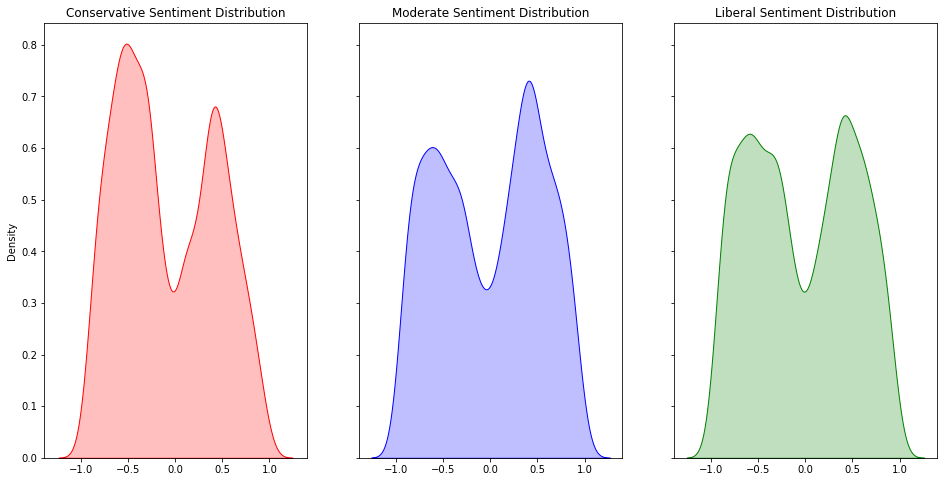

In [13]:
#Prepping data for Histogram
all_values_dict = {}
n=0
for df in political_alignment_df:
    values = df['OVERALL_SENTIMENT'].values.tolist()
    all_values_dict[political_alignment[n]] = values
    n+=1
#Histogram
fig,axes = plt.subplots(1,3,sharex=True, sharey=True, figsize=(16,8))
sns.kdeplot(data=all_values_dict['Conservative'], color='red', ax=axes[0], fill=True)
sns.kdeplot(data=all_values_dict['Moderate'],color='blue', ax=axes[1], fill=True)
sns.kdeplot(data=all_values_dict['Liberal'], color='green', ax=axes[2], fill=True)

axes[0].set_title("Conservative Sentiment Distribution")
axes[1].set_title('Moderate Sentiment Distribution')
axes[2].set_title('Liberal Sentiment Distribution')

#### Analysis of Distributions

According the the dataframe, Conservative media has the lowest average sentiment at -0.084 as well as the shortest interquartile range and standard deviation. While the lower bounds of the interquartile range is similar to the lower bounds of Moderate and Liberal media, its upperbound it 0.5 units lower than the other two. Its histogram shares a very similar story. It appears to be the skinniest of the graphs, supporting the fact that it has the smallest standard deviation and interquartile range. It is also clear that, compared to its positive tweets, Conservative media has many more negative tweets.

Moderate media has both the highest overall sentiment as well as the average sentiment closest to 0, -0.009. This supported by the graph as its two arches are almost equal in size though not equal in shape. The arch representing negative tweets is wide but shorter while the arch representing positive tweets is a bit taller but thinner. Despite its mean being lower than the others, Moderate and Liberal media share very similar distributions. Their standard deviations are almost identical. Their interquartile ranges are also very similar. There similarities are easily seen when comparing their histograms.

The only clear differences between Liberal media and Moderate media can be found in their means and their minute differences in histograms. Liberal media's average sentiment is a bit lower at -0.035 and its distribution of positive and negative tweets seem a bit more balanced. Neither of its peaks are significantly higher than the other.  Only the widths seem to be distinct, but again, not by a large margin. It has slighly more negative tweets than it does positive ones.

### Hypothesis Testing

In [14]:
def get_z_score(values1, values2):
    no_nan1 = []
    for value in values1:
        if value > -2:
            no_nan1.append(value)
            
    no_nan2 = []
    for value in values2:
        if value > -2:
            no_nan2.append(value)
            
    mean1= np.mean(np.array(no_nan1))
    mean2= np.mean(np.array(no_nan2))
    
    std1= np.std(np.array(no_nan1))
    std2= np.std(np.array(no_nan2))
    
    numerator = mean1-mean2
    denominator = math.sqrt((std1**2/len(no_nan1))+(std2**2/len(no_nan2)))
    z_score = numerator/denominator
    return z_score

In [15]:
conservative = np.array(conservative_df['OVERALL_SENTIMENT'].tolist())
moderate = np.array(moderate_df['OVERALL_SENTIMENT'].tolist())
liberal = np.array(liberal_df['OVERALL_SENTIMENT'].tolist())



In [16]:
#Conseravtive media vs Moderate media
get_z_score(moderate, conservative)

7.889158185595149

In [17]:
#Conservative media vs Liberal media
get_z_score(liberal, conservative)

5.39914503799316

In [18]:
#Moderate media vs Liberal media
get_z_score(moderate, liberal)

2.6598427812118195

#### Analysis of Z-scores

I tested the difference of sampling mean of each political alignment distribution for statistical significance. The null hypothesis is that there are no significant differences, the alternate hypothesis being that there are significant differences. The test was done at an alpha level of 5%, or at 95% percent certain. Per that parameter, the highest possible z-score that remains to support the null hypothesis is 1.64. As can be seen, each z-score is above that, meaning that there are significant differences between the means. Of the first two tests, both of where pertaining the comparisons of distributions of Conservative media with another, we can be sure that probability of them being samples of the same population is less than 0.0002. Moderate and Liberal media's distributions are more similar but still well within the critical range. Its p-value is 0.0004. 

### Sampling

I chose to create this section to help visualize what was being tested previously. There is the understanding that the distribution of sampling means should approximate to a normal distribution. What that means is, if you have a population and collect hundreds of samples, the means of those samples show render a normal distribution even if the original distribution is is not normal. The mean of this new normal distribution theorically is the mean of the population from which the samples are being pulled which make them quite important if it is impossible to collect data from the entire population. These normal distributions, the distribution of sampling means, are effectively what were being compared in the hypothesis test, or rather the average difference of the values of the distributions.

Since it would be impossible to perfectly visualize this due to the limitation of the data, a smaller version was created. I sampled from out of the original samples, collected their means, and plotted them on a graph.  The findings of this don't hold as much statistical weight, at least not within the realm of this particular notebook but it will make it a bit easier to understand the test statistic of the previous section and why it is useful. Effectively the original samples play the role of populations, and we can compare them through their sampling means. The more similar they are in shape and placement, the closer their differences reach 0 and the more likely they represent the same population.

#### Functions used in this Section

In [19]:
def random_index(size_index, size_data):
    index_set = set()
    while len(index_set) != size_index:
        random_variable = np.random.randint(size_data)
        index_set.add(random_variable) 
    return index_set

In [20]:
def random_sample_mean(political_alignment):
    values = all_values_dict[political_alignment]
    no_nan_values = []
    for value in values:
        if value > -2:
            no_nan_values.append(value)
    index = random_index(100, len(no_nan_values))
    sample_values = []
    for index in index:
        sample_value = no_nan_values[index]
        sample_values.append(sample_value)
    np_sample_values = np.array(sample_values)
    mean = np.mean(np_sample_values)
    return mean

In [21]:
def random_sample(political_alignment):
    values = all_values_dict[political_alignment]
    index = random_index(1000, len(values))
    sample_values = []
    for index in index:
        sample_value = values[index]
        sample_values.append(sample_value)
    np_sample_values = np.array(sample_values)
    true_values = []
    for value in np_sample_values:
        if value > -2:
            true_values.append(value)
    return true_values

#### Sampling Mean Distribution

In [22]:
#Collecting the distribution of sample means of each variable
conservative_means = []
for i in range (1000):
    conservative_sample_mean = random_sample_mean('Conservative')
    conservative_means.append(conservative_sample_mean)

moderate_means = []
for i in range (1000):
    moderate_sample_mean = random_sample_mean('Moderate')
    moderate_means.append(moderate_sample_mean)

liberal_means = []
for i in range (1000):
    liberal_sample_mean = random_sample_mean('Liberal')
    liberal_means.append(liberal_sample_mean)
    

In [23]:
conservative_mean = np.mean(np.array(conservative_means))
conservative_std = np.std(np.array(conservative_means))

moderate_mean = np.mean(np.array(moderate_means))
moderate_std = np.std(np.array(moderate_means))

liberal_mean = np.mean(np.array(liberal_means))
liberal_std = np.std(np.array(liberal_means))

print(f'''Conservatve Sampling Mean and Standard Deviation are ({round(conservative_mean,3)}, {round(conservative_std,3)}) respectively.
Moderate Sampling Mean and Standard Deviation are ({round(moderate_mean, 3)}, {round(moderate_std,3)}) respectively.
Liberal Sampling Mean and Standard Deviation are ({round(liberal_mean,3)}, {round(liberal_std,3)}) respectively.''')

Conservatve Sampling Mean and Standard Deviation are (-0.083, 0.053) respectively.
Moderate Sampling Mean and Standard Deviation are (-0.005, 0.054) respectively.
Liberal Sampling Mean and Standard Deviation are (-0.037, 0.056) respectively.


Text(0.5, 1.0, 'Sampling Mean Distribution')

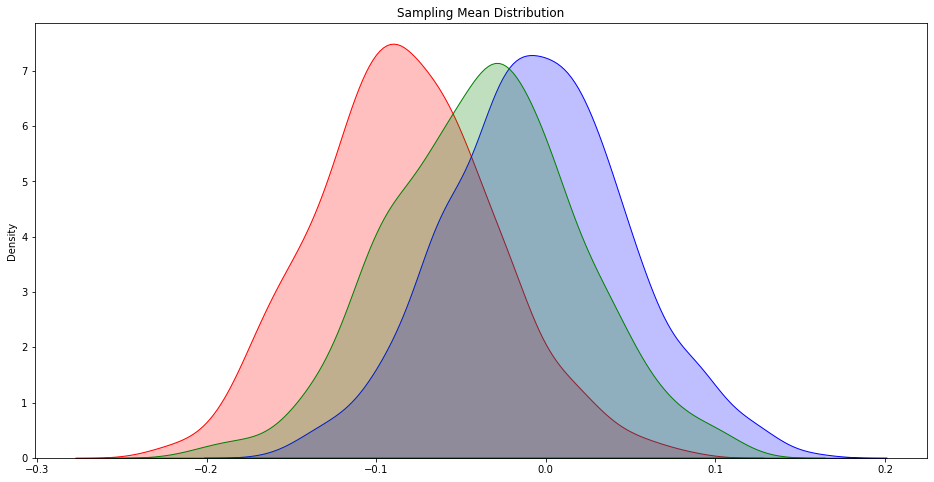

In [24]:
#Histograms
fig,axes = plt.subplots(1,1,sharex=True, sharey=True ,figsize=(16,8))
sns.kdeplot(data=conservative_means, color='red', ax=axes, fill=True)
sns.kdeplot(data=moderate_means,color='blue', ax=axes, fill=True)
sns.kdeplot(data=liberal_means, color='green', ax=axes, fill=True)


axes.set_title("Sampling Mean Distribution")

## Visualization Tweet Contents

Now that it is understood that the variables are statistically distinct from the standpoint of sentiment, we can now delve into why. Why are the distributions of sentiment distinct? What does their word choice look like? What were the topics most commonly mentioned? And, what percentages of the tweets were positive, negative, or neutral. From here on will be visualizations answering these questions as well as my analysis of the visualizations.   

#### Functions in use for this Section

In [25]:
def clean_data(string_):
    import string
    stopwords = list(get_stop_words('english'))
    string_punctuation = [char for char in string.punctuation]
    string_list = [char for char in string_ if char not in string_punctuation]
    clean_of_punt = ''.join(string_list)
    clean_punct_list = clean_of_punt.split()
    clean_of_stop_words = [word.upper() for word in clean_punct_list if word.lower() not in stopwords]
    return clean_of_stop_words

In [26]:
def bar_comparison_word(title, sub_titles, dfs, num_graph, color=None):
    if num_graph > 1:
        fig, axes = plt.subplots(1,num_graph, sharex=False, figsize=(20,10))
        fig.suptitle(title)
        for i in range (num_graph):
            axes[i].set_title(sub_titles[i])
    for i in range(num_graph):
        all_cleaned_data = []
        for list_ in dfs[i]['CONTENT']:
            string = list_[1:-1]
            cleaned_string = clean_data(string)
            all_cleaned_data.extend(cleaned_string)
        final = Counter(all_cleaned_data)
        new_df = pd.DataFrame(list(final.items()),columns = ['Word','Count']) 
        new_df.sort_values(by='Count', ascending=False, inplace=True)
        sns.set(style="darkgrid")
        if num_graph > 1:
            sns.barplot(x='Count',y='Word',data=new_df.iloc[0:15], color=color, orient= 'h', ax=axes[i])
        else:
            sns.barplot(x='Count',y='Word',data=new_df.iloc[0:15], color=color, orient= 'h')

In [27]:
def bar_comparison_NE(title, sub_titles, dfs, num_graph, color=None):
    if num_graph > 1:
        fig, axes = plt.subplots(1,num_graph, sharex=False, figsize=(20,10))
        fig.suptitle(title)
        for i in range (num_graph):
            axes[i].set_title(sub_titles[i])
    for i in range(num_graph):
        string_punct = [char for char in string.punctuation]
        stopwords = list(get_stop_words('english'))
        all_entities = []
        for list__ in dfs[i]['NAMED_ENTITIES']:
            entities = list__[1:-1]
            char_list = [char for char in entities if char not in string_punct]
            entity_list = ''.join(char_list).split()
            all_entities.extend(entity_list)
        cleaned_entities = [entity.upper() for entity in all_entities if entity.lower() not in stopwords]
        final = Counter(cleaned_entities)
        new_df = pd.DataFrame(list(final.items()),columns = ['Entity','Count']) 
        new_df.sort_values(by='Count', ascending=False, inplace=True)
        sns.set(style="darkgrid")
        if num_graph > 1:
            sns.barplot(x='Count',y='Entity',data=new_df.iloc[0:15], color=color, orient= 'h', ax=axes[i])
        else:
            sns.barplot(x='Count',y='Entity',data=new_df.iloc[0:15], color=color, orient= 'h')

In [28]:
def make_pie_sent(df, attr):
    dict_ = {'Neutral':len(df[df[attr].between(-0.40, 0.45, inclusive=False)]),
             'Negative':len(df[df[attr] <= -0.40]),
             'Positive':len(df[df[attr] >= 0.45])}
    pie_df = pd.DataFrame(list(dict_.items()),columns = ['Sentiment','Count'])
    pie_df.set_index('Sentiment', inplace=True)
    pie_df.plot.pie(autopct="%.1f%%", y='Count')

#### Polarity of Tweets

C:\Users\Jay\AppData\Local\Temp/ipykernel_51364/2948170151.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  dict_ = {'Neutral':len(df[df[attr].between(-0.40, 0.45, inclusive=False)]),


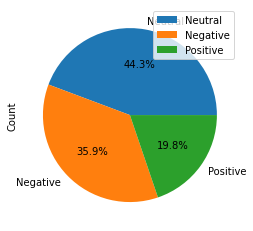

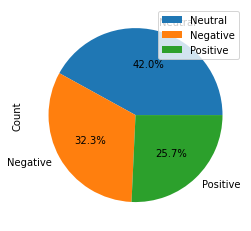

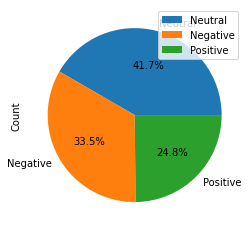

In [29]:
make_pie_sent(conservative_df, 'OVERALL_SENTIMENT') 
make_pie_sent(moderate_df, 'OVERALL_SENTIMENT') 
make_pie_sent(liberal_df, 'OVERALL_SENTIMENT') 

#### Analysis of Pie Chart

The pie charts aren't very different from each other. Neutral tweets seem to be the most plentiful, followed by negative tweets, and positive tweets being the most uncommon. The most noticeable distinction is that fact the Conservative media has a higher proportion of negative tweets and a lower proportion of positive tweets than Liberal and Moderate media. Other than that, the pie charts are very similar to each other. Liberal and Moderate media have almost identical proportions.

#### Topics and Word Choice

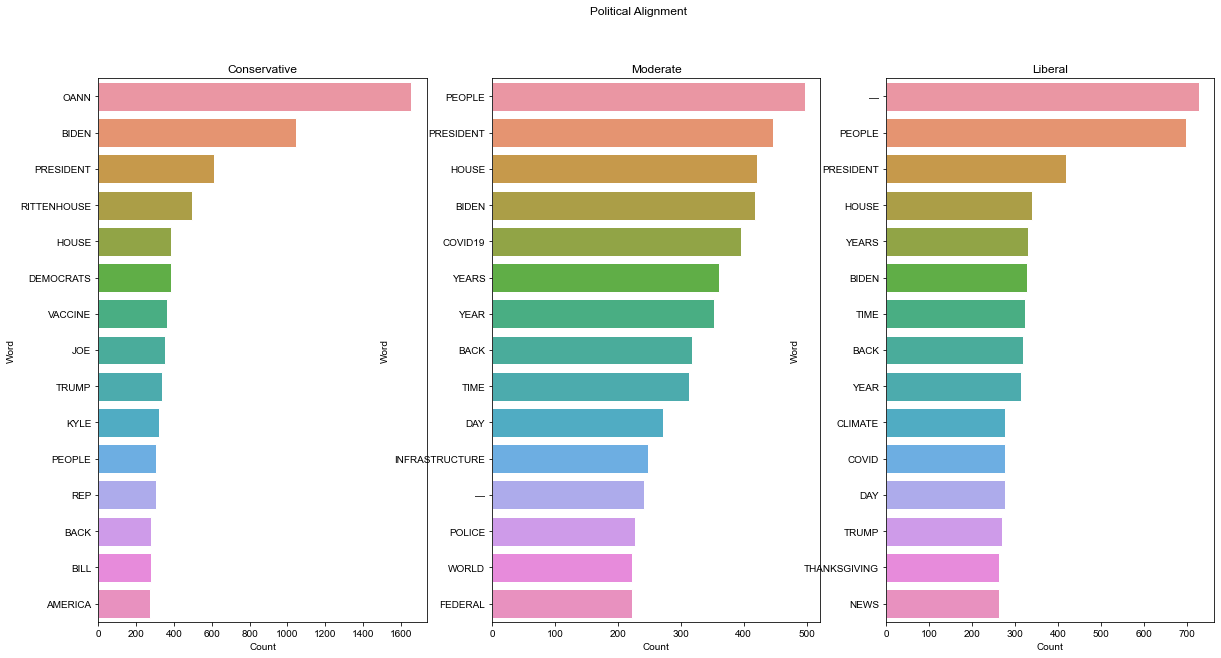

In [30]:
subtitles=['Conservative', 'Moderate', 'Liberal']
data= [conservative_df, moderate_df, liberal_df]
bar_comparison_word(title='Political Alignment', sub_titles=subtitles, dfs=data, num_graph=3)

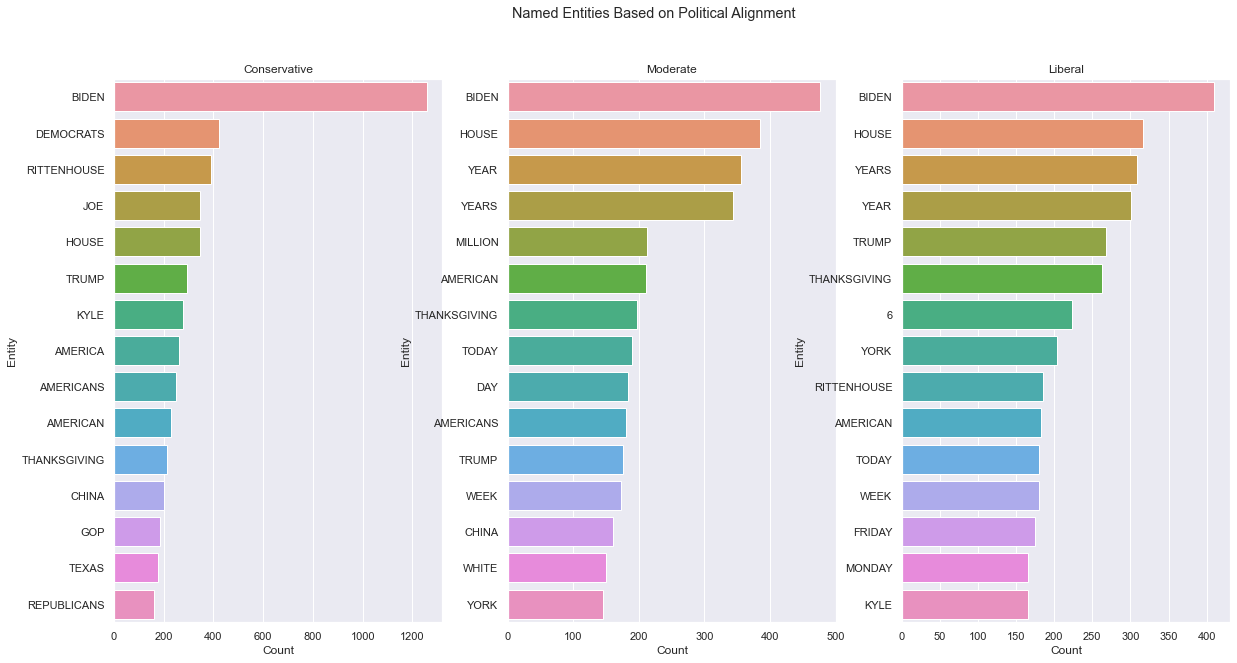

In [31]:
bar_comparison_NE(title='Named Entities Based on Political Alignment', sub_titles=subtitles, dfs=data, num_graph=3 )

#### Analysis of Graphs

Topics referred to frequently by all media types:
- President Biden
- The House of representatives
- Thanksgivinfg
- America / Americans
- Donald Trump
- The infrastructure bill

Topics referred to frequently by Conservative media:
- OANN
- Democrats
- Vaccine
- GOP / Republicans

Topics referred to frequently by Moderate media:
- Police
- World
- Federal
- Million
- White 

Topics referred to frequently by Liberal media:
- Climate
- News 
- Monday
- Friday

Topics referred to frequently by Moderate and Liberal media:
- Today
- New York
- Covid 

Topics referred to frequently by Moderate and Conservative media:
- China

Topics referred to frequently by Conservative and Liberal media:
- Kyle Rittenhouse
